# CPR appropriation baselines

This notebook contains actual Harvest trainings for the DQN baseline described in the original paper. The environment in use is a custom implementation of Harvest.

## Pre-requisites

The cells down below install and import the necessary libraries to successfully run the notebook examples.

In [104]:
import sys
sys.path.append('../')

In [107]:
%%capture
!pip install -r ../init/requirements.txt
!pip install ../src/gym_cpr_grid

In [111]:
import numpy as np
import gym
import ray
import matplotlib.pyplot as plt
from IPython import display

from src import rllib

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Utilities

The cell down below defines common variables to be used throughout the notebook.

In [112]:
n_agents = 11
grid_width = 39 
grid_height = 19
max_episodes = 4000
num_workers = 4
seed = 42
rllib_log_dir = "../rllib_logs/"
wandb_api_key = open("../wandb_api_key_file", "r").read().strip()
wandb_project = "cpr-appropriation"

In [113]:
ray.shutdown()
ray.init(local_mode=True)

2021-08-25 18:23:10,966	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8266


{'node_ip_address': '192.168.1.110',
 'raylet_ip_address': '192.168.1.110',
 'redis_address': '192.168.1.110:12604',
 'object_store_address': '/tmp/ray/session_2021-08-25_18-23-08_968429_19542/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-08-25_18-23-08_968429_19542/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-08-25_18-23-08_968429_19542',
 'metrics_export_port': 64055,
 'node_id': 'ea256894445029047db96235f0d0eb2f93609cc726b4ef31c45bc2b1'}

## Random

This section shows a simple set of random agents sifting through the environment, as a way to show the general Gym workflow and the how rendering works.

In [94]:
env = gym.make(
    'gym_cpr_grid:CPRGridEnv-v0', 
    n_agents=n_agents, 
    grid_width=grid_width, 
    grid_height=grid_height
)

In [ ]:
observations = env.reset()
fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env._max_episode_steps):
    display.display(plt.gcf())
    action_dict = {h: env.action_space.sample() for h in range(env.n_agents)}
    print(action_dict)
    observations, rewards, dones, infos = env.step(action_dict)
    print(infos)
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
env.close()

## DQN baseline

This section deals with various DQN baselines, with different combinations of tagging and gifting abilities. The DQN algorithm itself is implemented in the RLlib library and accessible through the `rllib.dqn_baseline` function.

### W/O tagging & W/O gifting

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=False,
    gifting_mechanism=None,
    num_workers=4,
    jupyter=True,
    seed=seed
)

### W/ tagging & W/O gifting

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=True,
    gifting_mechanism=None,
    num_workers=num_workers,
    jupyter=False,
    seed=seed
)

2021-08-25 18:24:56,212	WARNING util.py:55 -- Install gputil for GPU system monitoring.
2021-08-25 18:24:58,137	WARNING util.py:163 -- The `start_trial` operation took 2.346 s, which may be a performance bottleneck.


== Status ==
Memory usage on this node: 9.2/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+-------+
| Trial name                                 | status   | loc   |
|--------------------------------------------+----------+-------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  |       |
+--------------------------------------------+----------+-------+


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000:
  agent_timesteps_total: 1056
  custom_metrics: {}
  date: 2021-08-25_18-24-58
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: d7c9d60e82b747cb85777bd6138148e5
  hostna

wandb: Currently logged in as: wadaboa (use `wandb login --relogin` to force relogin)
wandb: WARNING Tried to auto resume run with id c7685_00000 but id fbba6_00000 is set.
wandb: Tracking run with wandb version 0.12.0
wandb: Syncing run DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000
wandb:  View project at https://wandb.ai/wadaboa/cpr-appropriation
wandb:  View run at https://wandb.ai/wadaboa/cpr-appropriation/runs/fbba6_00000
wandb: Run data is saved locally in /Users/jobs/Github/cpr-appropriation/notebooks/wandb/run-20210825_182501-fbba6_00000
wandb: Run `wandb offline` to turn off syncing.


== Status ==
Memory usage on this node: 9.8/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+--------------------------------------------+----------+---------------------+------------+


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000:
  agent_timesteps_total: 3168
  custom_metrics: {}
  date: 2021-08-25_18-25-03
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean:

== Status ==
Memory usage on this node: 9.9/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+-------------

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.1/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

2021-08-25 18:25:57,063	WARNING ray_trial_executor.py:709 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


== Status ==
Memory usage on this node: 9.9/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+-------------

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.0/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

== Status ==
Memory usage on this node: 10.2/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.3/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

2021-08-25 18:26:57,671	WARNING ray_trial_executor.py:709 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


== Status ==
Memory usage on this node: 10.4/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.4/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+
| Trial name                                 | status   | loc                 |   episodes |
|--------------------------------------------+----------+---------------------+------------|
| DQN_gym_cpr_grid:CPRGridEnv-v0_fbba6_00000 | RUNNING  | 192.168.1.110:19542 |          0 |
+------------

== Status ==
Memory usage on this node: 10.3/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.4/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

2021-08-25 18:27:58,347	WARNING ray_trial_executor.py:709 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


== Status ==
Memory usage on this node: 10.5/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.5/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.5/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

2021-08-25 18:28:59,235	WARNING ray_trial_executor.py:709 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


== Status ==
Memory usage on this node: 10.5/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.5/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.7/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

2021-08-25 18:30:03,575	WARNING ray_trial_executor.py:709 -- Over the last 60 seconds, the Tune event loop has been backlogged processing new results. Consider increasing your period of result reporting to improve performance.


== Status ==
Memory usage on this node: 10.6/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None


== Status ==
Memory usage on this node: 10.8/16.0 GiB
Using FIFO scheduling algorithm.
Resources requested: 5.0/16 CPUs, 0/0 GPUs, 0.0/4.34 GiB heap, 0.0/2.17 GiB objects (0.0/1.0 CPU_group_3_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_2_e8771a036fed53221c42d3b57c64506b, 0.0/5.0 CPU_group_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_1_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_4_e8771a036fed53221c42d3b57c64506b, 0.0/1.0 CPU_group_0_e8771a036fed53221c42d3b57c64506b)
Result logdir: /Users/jobs/Github/cpr-appropriation/rllib_logs/DQN_2021-08-25_18-24-55
Number of trials: 1/1 (1 RUNNING)
+--------------------------------------------+----------+---------------------+------------+---------+----------+---------+---------+
| Trial name                                 | status   | loc                 |   episodes |       U |        E |       S |       P |
|--------------------------------------------+----------+---------------------+------------+---------+----------+----

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
ERROR:root:dropped chunk 404 Client Error: Not Found for url: https://api.wandb.ai/files/wadaboa/cpr-appropriation/c7685_00000/file_stream
NoneType: None
2021-08-25 18:30:12,267	WARNING util.py:163 -- The `process_trial_result` operation took 0.527 s, which may be a performance bottleneck.
2021-08-25 18:30:12,268	WARNING util.py:163 -- Processing trial results took 0.528 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2021-08-25 18:30:12,269	WARNING util.py:163 -- The `process_trial` operation took 0.557 s, which may be a performance bottleneck.
2021-08-25 18:30:15,358	WARNING util.py:163 -- The `process_trial_result` operation took 0.509 s, which may be a performance bottleneck.
2021-08-25 18:30:15,359	WARNING util.py:163 -- Processing trial results took 0.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray

### W/O tagging & W/ gifting

#### Zero sum

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=False,
    gifting_mechanism=0,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Fixed budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=False,
    gifting_mechanism=1,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Replenishable budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=False,
    gifting_mechanism=2,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

### W/ tagging & W/ gifting

#### Zero sum

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=True,
    gifting_mechanism=0,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Fixed budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=True,
    gifting_mechanism=1,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

#### Replenishable budget

In [ ]:
experiment_analysis = rllib.dqn_baseline(
    n_agents,
    grid_width,
    grid_height,
    wandb_project,
    wandb_api_key,
    rllib_log_dir,
    max_episodes,
    tagging_ability=True,
    gifting_mechanism=2,
    num_workers=num_workers,
    jupyter=True,
    seed=seed
)

2021-08-25 17:50:49.357 | DEBUG    | src.policies:execute_episode:290 - Early stopping, all agents done
2021-08-25 17:50:49.397 | INFO     | src.policies:train:120 - Episode infos: {'efficiency': 129.8181818181818, 'equality': 0.8641456582676297, 'sustainability': 598.2819134881199, 'peace': 607.6363636363636}
2021-08-25 17:50:49.398 | INFO     | src.policies:train:125 - Mean episode return: 129.8181818181818
2021-08-25 17:50:49.399 | INFO     | src.policies:train:126 - Last 100 episodes mean return: 137.83471074380162
2021-08-25 17:50:49.399 | WARNING  | src.policies:train:136 - The actual batch size is 11000, instead of 4000
2021-08-25 17:51:00.224 | INFO     | src.policies:train:162 - Total loss: 0.9999077320098877
2021-08-25 17:51:00.225 | INFO     | src.policies:train:167 - Epoch infos: {'efficiency': 129.8181818181818, 'equality': 0.8641456582676297, 'sustainability': 598.2819134881199, 'peace': 607.6363636363636}
2021-08-25 17:51:00.277 | INFO     | src.policies:train:106 - Epoc

KeyboardInterrupt: 

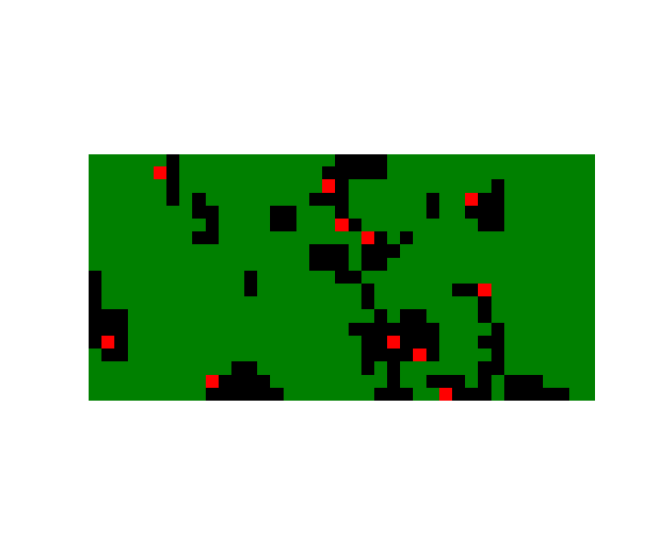

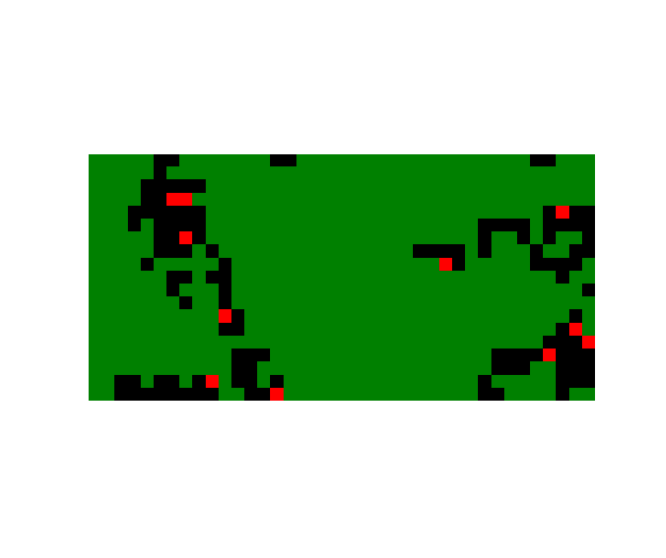

In [75]:
from src import models, policies
trpo_policy_nn = models.MLP(1260, [32, 32], 9)
trpo_baseline_nn = models.MLP(1260, [32, 32], 1, log_softmax=False)
trpo_policy = policies.TRPOPolicy(env, trpo_policy_nn, trpo_baseline_nn, beta=1.0, kl_target=0.01)
trpo_policy.train(
    4000,
    4000,
    enable_wandb=False,
    render_every=10
)